In [1]:
from plot import DataVisualizer

In [2]:
dv = DataVisualizer("ResNet/wd_sweep")

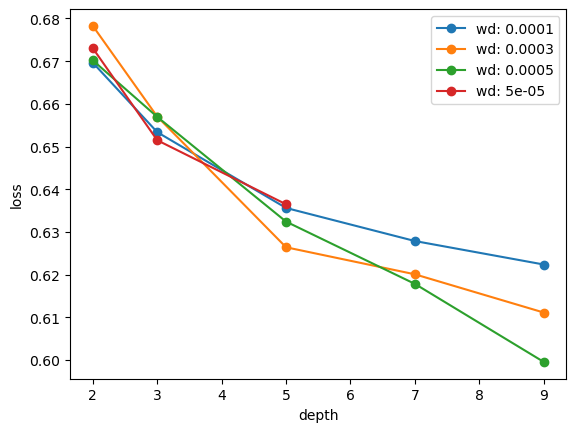

In [3]:
dv.visualize_data("depth", "wd")

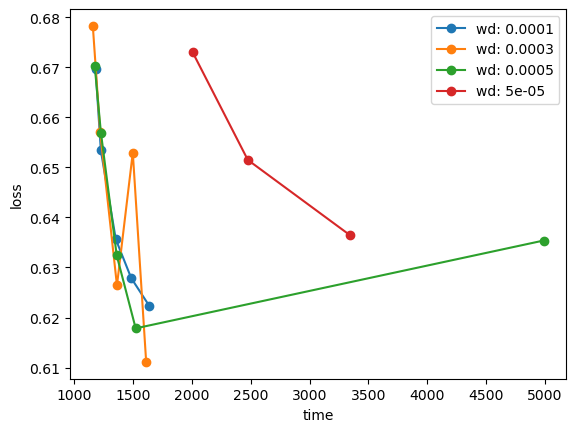

In [7]:
dv.visualize_data("time", "wd")